# Leibniz vs. Newton
* [Leibniz–Newton calculus controversy - Wikipedia](https://en.wikipedia.org/wiki/Leibniz%E2%80%93Newton_calculus_controversy)
* [Madhava series - Wikipedia](https://en.wikipedia.org/wiki/Madhava_series) (https://en.wikipedia.org/w/index.php?title=Madhava_series&oldid=1141010090)
    - (c.1340&ndash;c.1425) [Madhava of Sangamagrama - Wikipedia](https://en.wikipedia.org/wiki/Madhava_of_Sangamagrama)

In [1]:
!pip install -U lxml

  Using cached lxml-5.2.2-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (3.4 kB)
Using cached lxml-5.2.2-cp311-cp311-manylinux_2_28_x86_64.whl (5.0 MB)


In [2]:
import pandas as pd
wiki = pd.read_html('https://en.wikipedia.org/w/index.php?title=Madhava_series&oldid=1141010090')
wiki[0]

,No.,Series,Name,Western discoverers of the series and approximate dates of discovery[6]
0,1,sin x = x − ⁠x3/3!⁠ + ⁠x5/5!⁠ − ⁠x7/7!⁠ + ...,Madhava's sine series,Isaac Newton (1669) and Wilhelm Leibniz (1676)
1,2,cos x = 1 − ⁠x2/2!⁠ + ⁠x4/4!⁠ − ⁠x6/6!⁠ + ...,Madhava's cosine series,Isaac Newton (1669) and Wilhelm Leibniz (1676)
2,3,arctan x = x − ⁠x3/3⁠ + ⁠x5/5⁠ − ⁠x7/7⁠ + ...,Madhava's series for arctangent,James Gregory (1671) and Wilhelm Leibniz (1673)
3,4,⁠π/4⁠ = 1 − ⁠1/3⁠ + ⁠1/5⁠ − ⁠1/7⁠ + ...,Madhava's formula for π,James Gregory (1671) and Wilhelm Leibniz (1673)


## SymPyで検証する

In [3]:
from sympy import *
from sympy.abc import x

In [4]:
series(sin(x), x, 0, 10)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**10)

In [5]:
series(cos(x), x, 0, 10)

1 - x**2/2 + x**4/24 - x**6/720 + x**8/40320 + O(x**10)

In [6]:
series(atan(x), x, 0, 10)

x - x**3/3 + x**5/5 - x**7/7 + x**9/9 + O(x**10)

In [7]:
float(series(atan(x), x, 0, 80).removeO().subs(x, 1))*4

3.1165965567938323

In [8]:
float(series(atan(x), x, 0, 80).removeO().subs(x, 1))*4

3.1165965567938323

In [9]:
float(series(atan(x), x, 0, 80).removeO().subs(x, 1))*4

3.1165965567938323

In [10]:
float(series(atan(x), x, 0, 80).removeO().subs(x, 1))*4

3.1165965567938323

## Newtonによる $\sin(x)$ の級数展開

### $x = \sin(y)$ の逆関数 $y = \arcsin(x)$ を級数展開する

$\sin(y) = x$ とおく。$x$ を $x$ 軸上の点とすると、$y = \sin^{-1}(x) = \arcsin(x)$ は、次の図の円弧の長さに対応する。

単位円の周長 $l$ と面積 $s$ は、$l : 2 \pi = s : \pi$ より $\frac{l}{2} = s$ の関係がある。

$$
  \frac{1}{2} y = \frac{1}{2}\sin^{-1}(x) = \int_{0}^{x} \sqrt{1-x^2} - \frac{1}{2} x \sqrt{1-x^2}
$$

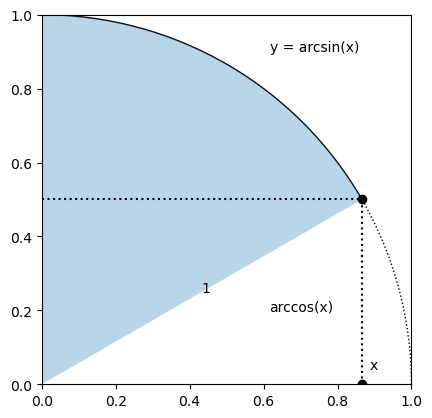

In [11]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

x = np.cos(np.radians(30))
y = np.sin(np.radians(30))

fig, ax = plt.subplots()

arc1 = patches.Arc([0,0], 2,2, theta1=0,  theta2=30, linestyle=':')
arc2 = patches.Arc([0,0], 2,2, theta1=30, theta2=90)
wdg2 = patches.Wedge([0,0], 1, theta1=30, theta2=90, fill=True, alpha=0.3)
ax.add_patch(arc1)
ax.add_patch(arc2)
ax.add_patch(wdg2)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_aspect("equal")
plt.plot(x, 0, "ok")
plt.plot(x, y, "ok")
plt.plot([0,x],[y,y], 'k:')
plt.plot([x,x],[0,y], 'k:')
plt.text(x/2, y/2, '1')
plt.text(x+.02, .04, 'x')
plt.text(x-.25, .9,  'y = arcsin(x)')
plt.text(x-.25, .2,  'arccos(x)')
plt.show()

* [Binomial theorem - Wikipedia](https://en.wikipedia.org/wiki/Binomial_theorem)
  - "Isaac Newton is generally credited with the generalized binomial theorem, valid for any rational exponent."
    - 「アイザック・ニュートンは、一般に、任意の有理数の指数に対して有効な一般二項定理を導いたとされている。」

$$
  (x + y)^r = \sum_{k=0}^\infty {r \choose k} x^{r-k} y^k
$$

$\sqrt{1-x^2} = (1-x^2)^\frac{1}{2}$ を二項級数に展開する:
  * [Binomial series - Wikipedia](https://en.wikipedia.org/wiki/Binomial_series)

In [12]:
from sympy.abc import x
x

x

In [13]:
(1-x**2)**(1/2)

(1 - x**2)**0.5

In [14]:
nsimplify(_)

sqrt(1 - x**2)

In [15]:
series((1-x**2)**(1/2))

1 - 0.5*x**2 - 0.125*x**4 + O(x**6)

In [16]:
nsimplify(series((1-x**2)**(1/2), x, 0, 10))

1 - x**2/2 - x**4/8 - x**6/16 - 5*x**8/128 + O(x**10)

積分する。多項式なので項ごとに積分できる:

In [17]:
nsimplify(integrate(series((1-x**2)**(1/2), x, 0, 10), x))

x - x**3/6 - x**5/40 - x**7/112 - 5*x**9/1152 + O(x**11)

これらによって、$\sin(x)$ の逆関数 $\sin^{-1}(x) = \arcsin(x)$ の級数展開はすぐに求められる:

In [18]:
arcsin_x = 2 * integrate(series((1-x**2)**(1/2), x, 0, 10), x) - expand(x * series((1-x**2)**(1/2), x, 0, 10))
nsimplify(arcsin_x)

x + x**3/6 + 3*x**5/40 + 5*x**7/112 + 35*x**9/1152 + O(x**11)

$0.1$ と $1$ のときの値を求めて検算する:

In [19]:
arcsin_x.removeO().subs(x,.1), asin(.1)

(0.100167421161334, 0.100167421161560)

In [20]:
arcsin_x.removeO().subs(x,1.), asin(1.)

(1.31669146825397, 1.57079632679490)

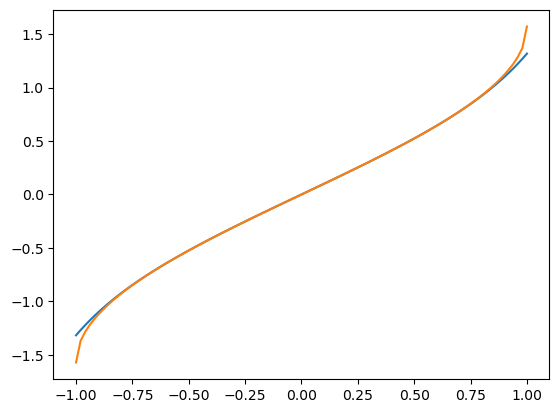

In [21]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 100)
Y = [arcsin_x.removeO().subs(x,xi) for xi in X]
plt.plot(X, Y)
plt.plot(X, np.arcsin(X))

SymPyの```series()```による検算:

In [22]:
series(asin(x),x, 0, 15)

x + x**3/6 + 3*x**5/40 + 5*x**7/112 + 35*x**9/1152 + 63*x**11/2816 + 231*x**13/13312 + O(x**15)

### Newtonの力業

恒等式 $\sin^{-1}(\sin(x)) = x$ がなりたつ。さらに、$\sin(x)$ の級数展開を
$\sin(x) = a_{0} + a_{1} x + a_{2} x^2 + a_{3} x^3 + \cdots$ とおいて、上で得られた $\sin^{-1}(x)$ の級数展開式へ代入しする。変数 $x$ の係数が、一次のみ $1$、それ以外の次数では $0$ となることから、順次 $a_{0}, a_{1}, a_{2},...$ を求める。 

$$
  \begin{align}
    \sin(x) &\approx a_{0} \\
    \sin(x) &\approx a_{0} + a_{1} x \\
    \sin(x) &\approx a_{0} + a_{1} x + a_{2} x^2 \\
    \sin(x) &\approx a_{0} + a_{1} x + a_{2} x^2 + a_{3} x^3 \\
  \end{align}
$$

In [23]:
a=symbols('a:11', Real=True)
sin_x=a[0]+a[1]*x+a[2]*x**2+a[3]*x**3+a[4]*x**4+a[5]*x**5+a[6]*x**6+a[7]*x**7+a[8]*x**8+a[9]*x**9
sol=[[a[0],0],[a[1],0],[a[2],0],[a[3],0],[a[4],0],[a[5],0],[a[6],0],[a[7],0],[a[8],0],[a[9],0]]
sol

[[a0, 0],
 [a1, 0],
 [a2, 0],
 [a3, 0],
 [a4, 0],
 [a5, 0],
 [a6, 0],
 [a7, 0],
 [a8, 0],
 [a9, 0]]

In [24]:
sin_x.subs(sol)

0

In [25]:
ax=Symbol('ax', real=True)

In [26]:
sol[1][1]=ax
sol

[[a0, 0],
 [a1, ax],
 [a2, 0],
 [a3, 0],
 [a4, 0],
 [a5, 0],
 [a6, 0],
 [a7, 0],
 [a8, 0],
 [a9, 0]]

In [27]:
sin_x.subs(sol)

ax*x

In [28]:
bx=nsimplify(expand(arcsin_x.removeO().subs(x, sin_x.subs(sol))))
bx

35*ax**9*x**9/1152 + 5*ax**7*x**7/112 + 3*ax**5*x**5/40 + ax**3*x**3/6 + ax*x

恒等式 $\sin^{-1}(\sin(x)) = x$ より、多項式の係数を比較すると、恒等式が成立する条件は $a_{x} = 1$ のとき。

In [29]:
cx=poly(bx-x,x).all_coeffs()[::-1]
cx[1]

ax - 1

### 解析的に解く

In [30]:
solve(cx[1],ax)

[1]

このように、$a_{0}$ から順に係数 $a_1$, $a_2$, $a_3$... を決めていくプログラムは次のようになる:

In [31]:
sol=[[a[0],0],[a[1],0],[a[2],0],[a[3],0],[a[4],0],[a[5],0],[a[6],0],[a[7],0],[a[8],0],[a[9],0]]

for i in range(10):
    sol[i][1]=ax
    print("sin(x) =", sin_x.subs(sol))
    bx=nsimplify(expand(arcsin_x.removeO().subs(x, sin_x.subs(sol))))
    cx=poly(bx-x,x).all_coeffs()[::-1]
    s=solve(cx[i],ax)
    print("a[{:d}] =".format(i), s[0])
    sol[i][1]=s[0]

nsimplify(sin_x.subs(sol))

sin(x) = ax
a[0] = 0
sin(x) = ax*x
a[1] = 1
sin(x) = ax*x**2 + x
a[2] = 0
sin(x) = ax*x**3 + x
a[3] = -1/6
sin(x) = ax*x**4 - x**3/6 + x
a[4] = 0
sin(x) = ax*x**5 - x**3/6 + x
a[5] = 1/120
sin(x) = ax*x**6 + x**5/120 - x**3/6 + x
a[6] = 0
sin(x) = ax*x**7 + x**5/120 - x**3/6 + x
a[7] = -39682539682541/200000000000000000
sin(x) = ax*x**8 - 39682539682541*x**7/200000000000000000 + x**5/120 - x**3/6 + x
a[8] = 0
sin(x) = ax*x**9 - 39682539682541*x**7/200000000000000000 + x**5/120 - x**3/6 + x
a[9] = 137786596120411/50000000000000000000


137786596120411*x**9/50000000000000000000 - 39682539682541*x**7/200000000000000000 + x**5/120 - x**3/6 + x

In [32]:
1/(39682539682541/200000000000000000)

5039.999999999833

In [33]:
1/(137786596120411/50000000000000000000)

362879.9999987318

In [34]:
import math
list(map(math.factorial, range(11)))

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]

In [35]:
# SymPyのseries()を呼び出して検算
series(sin(x),x, 0, 10)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**10)

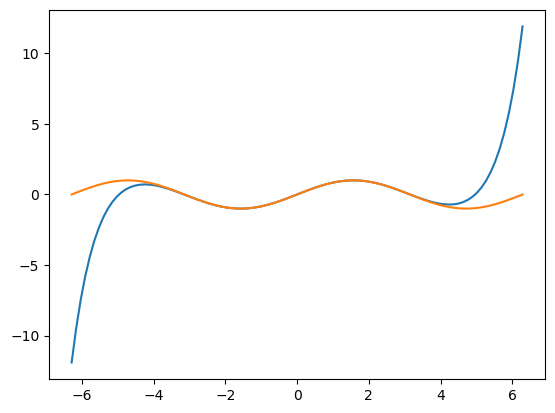

In [36]:
# グラフプロットで可視化
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-2*np.pi, 2*np.pi, 100)
Y = [sin_x.subs(sol).subs(x,xi) for xi in X]
plt.plot(X, Y)
plt.plot(X, np.sin(X))

### 力業の続き: 代数的に解く

以下、力業で解く場合の続き:

定数項は $0$ なので、$a_{0} = 0$

In [133]:
nsimplify(expand(asx.removeO().subs(x, a[1]*x)))

35*a1**9*x**9/1152 + 5*a1**7*x**7/112 + 3*a1**5*x**5/40 + a1**3*x**3/6 + a1*x

In [117]:
poly(nsimplify(expand(asx.removeO().subs(x, a[1]*x))),x).all_coeffs()[::-1][1]

a1

$x$ の係数は $1$ なので、$a_{1} = 1$

In [134]:
nsimplify(expand(asx.removeO().subs(x, x+a[2]*x**2)))

35*a2**9*x**18/1152 + 35*a2**8*x**17/128 + 35*a2**7*x**16/32 + 5*a2**7*x**14/112 + 245*a2**6*x**15/96 + 5*a2**6*x**13/16 + 245*a2**5*x**14/64 + 15*a2**5*x**12/16 + 3*a2**5*x**10/40 + 245*a2**4*x**13/64 + 25*a2**4*x**11/16 + 3*a2**4*x**9/8 + 245*a2**3*x**12/96 + 25*a2**3*x**10/16 + 3*a2**3*x**8/4 + a2**3*x**6/6 + 35*a2**2*x**11/32 + 15*a2**2*x**9/16 + 3*a2**2*x**7/4 + a2**2*x**5/2 + 35*a2*x**10/128 + 5*a2*x**8/16 + 3*a2*x**6/8 + a2*x**4/2 + a2*x**2 + 35*x**9/1152 + 5*x**7/112 + 3*x**5/40 + x**3/6 + x

In [119]:
poly(nsimplify(expand(asx.removeO().subs(x, x+a[2]*x**2))),x).all_coeffs()[::-1][2]

a2

$a_{2} = 0$

In [135]:
nsimplify(expand(asx.removeO().subs(x, x+a[3]*x**3)))

35*a3**9*x**27/1152 + 35*a3**8*x**25/128 + 35*a3**7*x**23/32 + 5*a3**7*x**21/112 + 245*a3**6*x**21/96 + 5*a3**6*x**19/16 + 245*a3**5*x**19/64 + 15*a3**5*x**17/16 + 3*a3**5*x**15/40 + 245*a3**4*x**17/64 + 25*a3**4*x**15/16 + 3*a3**4*x**13/8 + 245*a3**3*x**15/96 + 25*a3**3*x**13/16 + 3*a3**3*x**11/4 + a3**3*x**9/6 + 35*a3**2*x**13/32 + 15*a3**2*x**11/16 + 3*a3**2*x**9/4 + a3**2*x**7/2 + 35*a3*x**11/128 + 5*a3*x**9/16 + 3*a3*x**7/8 + a3*x**5/2 + a3*x**3 + 35*x**9/1152 + 5*x**7/112 + 3*x**5/40 + x**3/6 + x

In [136]:
poly(nsimplify(expand(asx.removeO().subs(x, x+a[3]*x**3))),x).all_coeffs()[::-1]

[0,
 1,
 0,
 a3 + 1/6,
 0,
 a3/2 + 3/40,
 0,
 a3**2/2 + 3*a3/8 + 5/112,
 0,
 a3**3/6 + 3*a3**2/4 + 5*a3/16 + 35/1152,
 0,
 3*a3**3/4 + 15*a3**2/16 + 35*a3/128,
 0,
 3*a3**4/8 + 25*a3**3/16 + 35*a3**2/32,
 0,
 3*a3**5/40 + 25*a3**4/16 + 245*a3**3/96,
 0,
 15*a3**5/16 + 245*a3**4/64,
 0,
 5*a3**6/16 + 245*a3**5/64,
 0,
 5*a3**7/112 + 245*a3**6/96,
 0,
 35*a3**7/32,
 0,
 35*a3**8/128,
 0,
 35*a3**9/1152]

In [137]:
poly(nsimplify(expand(asx.removeO().subs(x, x+a[3]*x**3))),x).all_coeffs()[::-1][3]

a3 + 1/6

$a_{3} + \frac{1}{6} = 0$ より、$a_{3} = - \frac{1}{6}$

In [142]:
poly(nsimplify(expand(asx.removeO().subs(x, x-1/6*x**3+a[5]*x**5))),x).all_coeffs()[::-1][5]

a5 - 1/120

$a_{5} - \frac{1}{120} = 0$ より、$a_{5} = \frac{1}{120}$

$a_7$ は計算精度がたりない・・・

In [153]:
poly(nsimplify(expand(asx.removeO().subs(x, x-1/6*x**3+1/120*x**5+a[7]*x**7))),x).all_coeffs()[::-1][7]

a7 + 39682539682541/200000000000000000

In [151]:
200000000000000000/39682539682541

5039.999999999833